In [65]:
import pandas as pd
import matplotlib.pyplot as plt
csv = pd.read_csv(f"predator_output_4.csv")

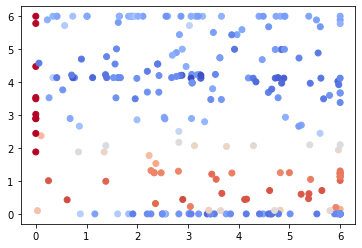

In [66]:
plt.scatter(csv['gamma1'], csv['gamma2'], c=csv['alive'],cmap='coolwarm')
plt.show()

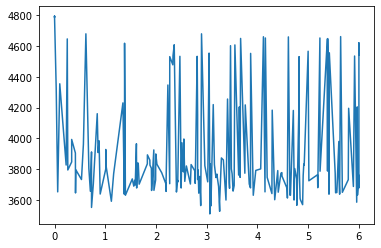

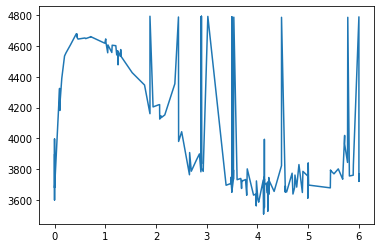

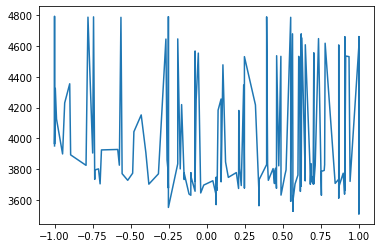

In [67]:
for val in ("gamma1","gamma2","k"):
    csv = csv.sort_values(by=val)
    plt.plot(csv[val], csv['alive'])
    plt.show()

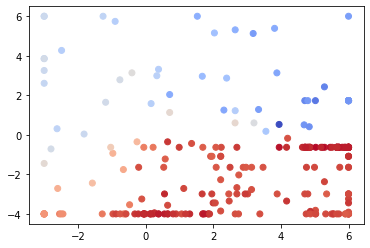

In [68]:
csv = pd.read_csv(f"prey_output_4.csv")
plt.scatter(csv['alpha'], csv['beta'], c=csv['alive'],cmap='coolwarm')
plt.show()

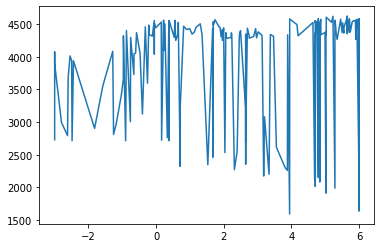

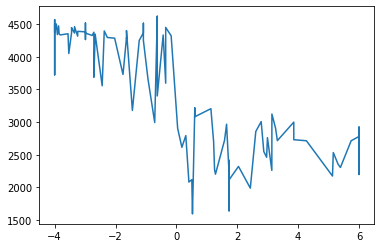

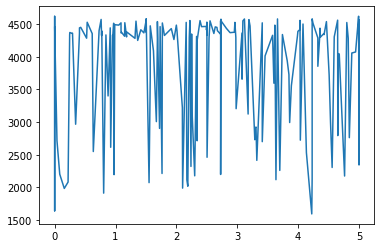

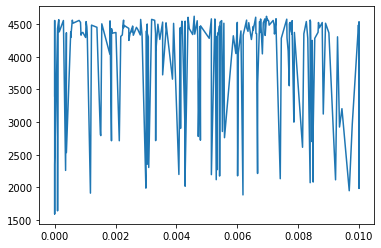

In [69]:
for val in ("alpha","beta","gamma","delta"):
    csv = csv.sort_values(by=val)
    plt.plot(csv[val], csv['alive'])
    plt.show()

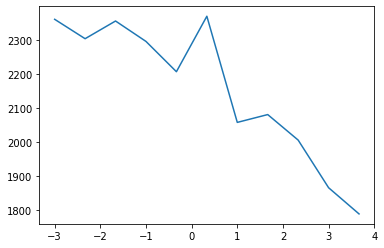

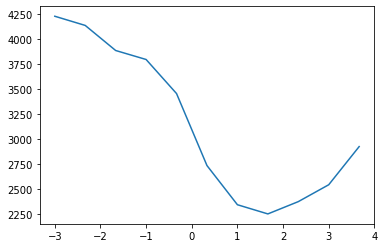

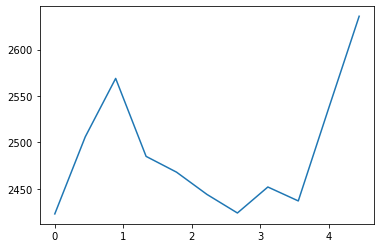

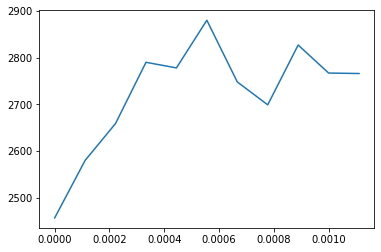

In [70]:
csv = pd.read_csv(f"test_const_prey.csv")
for i,val in enumerate(["alpha","beta","gamma","delta"]):
    temp = csv.loc[i*11:(i+1)*11-1]
    plt.plot(temp[val], temp['alive'])
    plt.show()

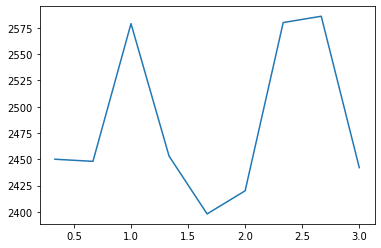

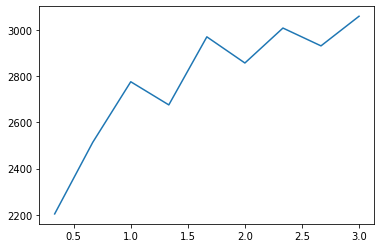

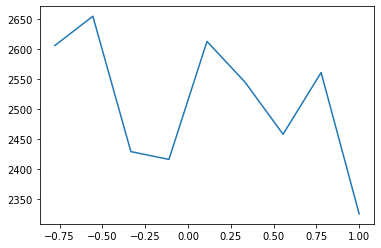

In [71]:
csv = pd.read_csv(f"test_const_predator.csv")
for i,val in enumerate(["gamma1","gamma2","k"]):
    temp = csv.loc[i*10+1:(i+1)*10-1]
    plt.plot(temp[val], temp['alive'])
    plt.show()

In [72]:
iterationCount = 15
for i in range(iterationCount):
    print(f"Prey iteration {i+1}")
    csv = pd.read_csv(f"prey_output_{i}.csv")
    top_alive = csv.sort_values(by='alive', ascending=False).head(10)
    print(top_alive[['alpha','beta','gamma','delta','alive']].describe().loc[['mean', 'std']])
    best = csv.sort_values(by='alive', ascending=False).head(1)
    print(best[['alpha','beta','gamma','delta','alive']])
    print(f"Predator iteration {i+1}")
    csv = pd.read_csv(f"predator_output_{i}.csv")
    top_alive = csv.sort_values(by='alive', ascending=True).head(10)
    print(top_alive[['gamma1','gamma2','k','alive']].describe().loc[['mean', 'std']])
    best = csv.sort_values(by='alive', ascending=True).head(1)
    print(best[['gamma1','gamma2','k','alive']])

Prey iteration 1
         alpha      beta     gamma    delta        alive
mean  5.078185 -0.609306  0.945417  0.00174  4662.200000
std   1.863785  0.562595  1.029796  0.00231     6.876692
     alpha      beta  gamma     delta  alive
167    6.0 -0.409294    0.0  0.000001   4674
Predator iteration 1
      gamma1        gamma2    k   alive
mean     6.0  1.000000e-06  1.0  3314.0
std      0.0  2.232128e-22  0.0     0.0
     gamma1    gamma2    k  alive
239     6.0  0.000001  1.0   3314
Prey iteration 2
         alpha      beta     gamma     delta        alive
mean  0.459681 -3.947347  0.467222  0.001255  4752.400000
std   0.150209  0.008778  0.871748  0.001706     4.325634
        alpha     beta     gamma     delta  alive
168  0.402777 -3.94598  0.850716  0.000551   4758
Predator iteration 2
        gamma1    gamma2         k        alive
mean  4.115107  1.248696 -0.167818  4531.600000
std   1.463628  0.076928  0.187704     5.358275
     gamma1   gamma2         k  alive
236  2.6501  1.0992

In [73]:
iterationCount = 15
prey_fields = ('alpha','beta','gamma','delta')
predator_fields = ('gamma1','gamma2','k')
df = pd.DataFrame()
for i in prey_fields: df[i] = [0 for _ in range(iterationCount)]
for i in predator_fields: df[i] = [0 for _ in range(iterationCount)]
for i in range(iterationCount):
    csv = pd.read_csv(f"prey_output_{i}.csv")
    best = csv.sort_values(by='alive', ascending=False).head(1).iloc[0]
    for j in range(4):
        df.iloc[i,j] = best[j]
    csv = pd.read_csv(f"predator_output_{i}.csv")
    best = csv.sort_values(by='alive', ascending=True).head(1).iloc[0]
    for j in range(4,7):
        df.iloc[i,j] = best[j]
print(df)

       alpha      beta     gamma     delta   gamma1    gamma2         k
0   6.000000 -0.409294  0.000000  0.000001  6.00000  0.000001  1.000000
1   0.402777 -3.945980  0.850716  0.000551  2.65010  1.099210  0.094871
2   6.000000 -0.692297  3.636740  0.002957  1.30131  0.000001 -0.004983
3   0.210215 -0.440926  0.082652  0.000001  6.00000  1.181680 -0.081849
4   5.651750 -0.629109  4.992890  0.004584  3.06122  4.121500  1.000000
5   0.008524 -3.581610  0.371977  0.001070  3.05233  1.027820  0.746132
6   0.285491 -4.000000  0.000000  0.000001  6.00000  1.269930 -0.155983
7   6.000000 -0.561482  1.089600  0.003120  3.76584  4.012060  1.000000
8   0.116909 -3.860050  4.500980  0.000480  6.00000  1.248250 -0.050301
9  -0.178981 -3.694480  0.000000  0.000060  2.77220  1.273320  0.244063
10  0.419063 -3.923670  0.000000  0.000001  3.79426  1.299340 -0.377246
11  4.232440 -0.537789  3.813770  0.001883  6.00000  4.214300  0.787112
12  0.086706 -3.542870  2.304000  0.000309  3.11984  1.195730 -0

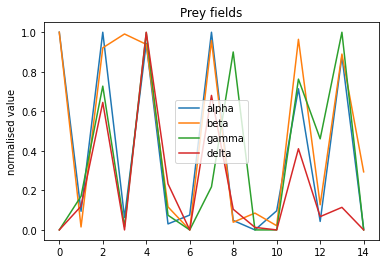

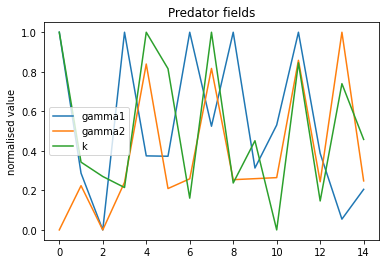

In [74]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

for col in prey_fields:
    plt.plot(normalize(df[col]), label=col)

plt.legend()
plt.ylabel("normalised value")
plt.title("Prey fields")
plt.show()

for col in predator_fields:
    plt.plot(normalize(df[col]), label=col)

plt.legend()
plt.ylabel("normalised value")
plt.title("Predator fields")
plt.show()


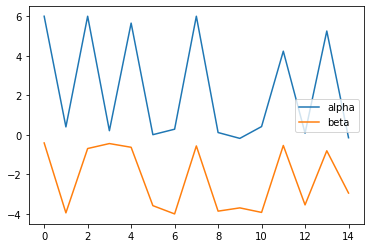

In [75]:
for col in ('alpha','beta'):
    plt.plot(df[col], label=col)

plt.legend()
plt.show()